In [2]:
# 11/18 (화) 수업 못 들은 부분

# Built-in Dataset

-   파이토치는 분야별 공개 데이터셋을 종류별로 torchvision, torchtext, torchaudio 모듈을 통해 제공.
-   모든 built-in dataset은 [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset)의 하위클래스로 구현돼있다.
    -   [computer vision dataset](https://pytorch.org/vision/stable/datasets.html)
    -   [audio dataset](https://pytorch.org/audio/stable/datasets.html)

## Image Built-in dataset Loading

torchvision 모듈을 통해 다양한 오픈소스 이미지 데이터셋을 loading할 수 있는 Dataset 클래스를 제공.

-   각 Dataset 클래스의 주요 매개변수 (클래스들 마다 약간의 차이가 있다.)
    -   **root**: str
        -   Raw data를 저장할 디렉토리 경로
    -   **train**: bool
        -   True일경우 Train set을 False일 경우 Test set을 load
    -   **download**: bool
        -   True이면 root에 지정된 경로에 raw 데이터를 인터셋에서 download할지 여부. 이미 저장되 있는 경우 download하지 않는다.
    -   **transform**: function
        -   Loading한 이미지를 변환하는 function.
            -   Normalization이나 data Agumentation 처리를 한다.


In [3]:
import torch
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

In [4]:
mnist_data_dir = "datasets/MNIST"
# mnist_data_dir = r"c:\temp"
mnist_trainset = datasets.MNIST(
    root=mnist_data_dir, # raw data의 위치.
    download=True,       # root에 지정한 경로에 없을 경우 다운받을지 여부
    train=True,          # True: train set, False: test set
)

In [5]:
type(mnist_trainset), isinstance(mnist_trainset, Dataset)

(torchvision.datasets.mnist.MNIST, True)

In [6]:
mnist_trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: datasets/MNIST
    Split: Train

In [7]:
# Dataset의 총 데이터개수를 조회 - len()
len(mnist_trainset)

60000

In [8]:
import numpy
numpy.__version__

'1.26.4'

In [9]:
# 개별 데이터를 조회 -> indexing
mnist_trainset[0]  # 개별데이터는 x(input)과 y(output)로 구성되어 tuple(x,  y)로 반환.

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [10]:
# 첫번째 데이터 조회
x0 = mnist_trainset[0]

# 첫번째 데이터 이미지 확인
x0[0]

In [11]:
# 첫번째 데이터 label 확인
x0[1]

5

In [12]:
######################################################################
# Target class 값 조회
######################################################################
# class index(id) - class name
## class index(class id): 인코딩 된 label의 클래스, 
## class name: 실제 class의 이름.
### 0-setosa 의 경우 0: class index, setosa: class name

mnist_trainset.class_to_idx
# dict: key-class name, value: class index
# class name으로 class index를 조회할 수있다.

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [13]:
mnist_trainset.class_to_idx['2 - two']

2

In [14]:
mnist_trainset.classes 
# list: index-class index, value-class name
# class index로 class 이름을 조회 가능.

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [15]:
mnist_trainset.classes [8]

'8 - eight'


## Dataset의 transform 매개변수를 이용한 데이터 전처리

- Dataset을 생성할 때, **원본 데이터를 제공하기 전 수행할 전처리 과정**을 함수(callable) 형태로 정의.
- 이 함수(callable)는 **입력 데이터 하나**를 매개변수로 받아, 전처리된 결과를 반환하도록 구현.
- transform 매개변수에는 데이터 파이프라인을 구성하는 함수나 callable 객체를 설정.

### torchvision에서 제공하는 주요 transform

- `torchvision.transforms.ToTensor`
  - PIL 이미지(PIL Image)나 넘파이 배열(NumPy ndarray)을 FloatTensor(float32 Tensor)로 변환한다.
  - 이미지 픽셀의 값(intensity)을 \[0., 1.\] 범위로 비례 조정한다.
  - 이미지의 형태(shape)를 (채널, 높이, 너비) 순서로 변경한다.
  - 자세한 내용은 [torchvision transforms 공식 문서](https://pytorch.org/vision/stable/transforms.html) 참고.

- `torchvision.transforms.Normalize`
  - 각 채널별로 지정된 평균(mean)을 빼고, 표준편차(standard deviation)로 나누어 정규화(normalization)를 수행한다.
  - `ToTensor()`로 변환된 데이터를 입력받아 추가 변환을 적용한다.

- `torchvision.transforms.Compose`
  - 여러 변환을 순차적으로 적용하고 싶을 때, `Compose` 클래스를 사용해 변환들을 하나로 묶는다.

In [16]:
mnist_trainset2 = datasets.MNIST(
    root=mnist_data_dir, 
    download=True,       
    train=True,
    transform=transforms.ToTensor()  # 전처리 callable 전달.
)

In [17]:
x0_2 = mnist_trainset2[0]

In [18]:
# ToTensor()의 전처리 작업.
print(x0_2[0].type())  # PIL.Image, np.ndarray -> pytorch Tensor 로 변환
print(x0_2[0].min(), x0_2[0].max()) # 0 ~ 1 사이로 scaling. (MinMaxScaling)
print(x0_2[0].shape) # channel first 로 shape을 변경. (channel, height, width)

torch.FloatTensor
tensor(0.) tensor(1.)
torch.Size([1, 28, 28])


In [19]:
# ToTensor() -> Normalize()
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize(mean=0.5, std=0.5)  # 모든 채널에 동일한 값을 적용: 상수., 채널별로 다른 값 적용: 리스트.
])

mnist_trainset3 = datasets.MNIST(
    root=mnist_data_dir, 
    download=True,       
    train=True,
    transform=transform
)

In [20]:
x_3 = mnist_trainset3[0]

In [21]:
print(x_3[0].type())
print(x_3[0].shape)
print(x_3[0].min(), x_3[0].max())


torch.FloatTensor
torch.Size([1, 28, 28])
tensor(-1.) tensor(1.)


In [22]:
# 11/19(수) 9:20

### TODO: CIFAR10 Dataset loading
- `datasets.CIFAR10` 이용
-   CIFAR10 Built-in dataset 을 LOADING 후 다음을 확인하시오.
    1. Dataset loading
    1. train dataset, test dataset의 데이터 개수 확인
    1. class index - class name 확인
    1. train set의 이미지 5장을 출력. label의 이름을 title로 출력.


In [23]:
# !uv pip install tqdm # 다운로드 보이는 패키지

In [24]:
from torchvision.datasets import CIFAR10

root_path = "datasets"
c_trainset = CIFAR10(root=root_path, train=True, download=True)
c_testset = CIFAR10(root=root_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [25]:
# 개수
len(c_trainset), len(c_testset)

(50000, 10000)

In [26]:
c_trainset[0]

(<PIL.Image.Image image mode=RGB size=32x32>, 6)

In [27]:
c_trainset.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [28]:
c_trainset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

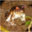

In [29]:
c_trainset[0][0]

6 frog


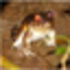

9 truck


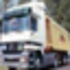

9 truck


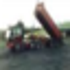

4 deer


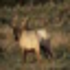

1 automobile


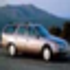

In [30]:
from IPython.display import display
for i in range(5):
    print(c_trainset[i][1], c_trainset.classes[c_trainset[i][1]])
    display(c_trainset[i][0].resize((70, 70))) # resize는 tuple로 줘야 함. 


In [34]:
print(np.__version__)

1.26.4


In [33]:
import numpy as np

np.array(c_trainset[0][0]).shape

(32, 32, 3)

## DataLoader 생성

-   DataLoader
    -   모델이 학습하거나 추론할 때 Dataset의 데이터를 batch size 개수단위로 모아서 모델에 제공.
    -   initalizer속성
        -   dataset: 값을 제공하는 Dataset 타입 객체
        -   batch_size: 한번에 값을 제공할 batch 크기
        -   shuffle: 에폭마다 데이터셋을 섞을 지 여부 (default: False)
        -   drop_last: 마지막 배치의 데이터개수가 batch_size 설정보다 적을 경우 제공할 지 여부(False-기본값, 제공. True: 제공하지 않는다.)


In [ ]:
from torch.utils.data import DataLoader

mnist_train_loader = DataLoader(mnist_trainset2, batch_size=1000, shuffle=True, drop_last=True)

# trainset: shuffle=True, drop_last=True
# valid/testset: shuffle=False, drop_last=False (기본)

In [ ]:
# step 수 조회. 몇 번 만에 전체 데이터셋을 다 가져오는지 조회.
len(mnist_train_loader)

60

# Custom Dataset 구현

사용자가 보유한 데이터를 이용하여 커스텀 Dataset을 생성할 수 있다.

## 구현 방법
1. `torch.utils.data.Dataset` 클래스를 상속하는 새로운 클래스를 정의.

2. `__init__(self, ...)`
   - Dataset 객체 생성 시 필요한 설정을 초기화.
   - 예를 들어, 데이터 저장 경로, transform 설정 여부 등을 초기화.

3. `__len__(self)`
   - 전체 데이터의 개수를 반환하도록 구현.
   - DataLoader가 배치를 생성할 때 이 정보를 사용.

4. `__getitem__(self, index)`
   - index에 해당하는 데이터 포인트를 반환.
   - 입력(input, X)과 출력(output, y)을 튜플 형태로 반환.
   - transform이 설정되어 있을 경우, 변환된 입력 데이터를 반환.


In [ ]:
class Test:

class MyDataSet(Dataset):  # dataset 상속
    def __init__(self):
        pass
        # 제공한 데이터들을 초기화.
        self.x_data = torch.FloatTensor([[1,1], [2,2], [3,3], [4,4], [5,5]])
        self.y_data = torch.FloatTensor([[2], [4], [6], [8], [10]])
        self.len = self.x_data.shape[0]

    def __len__(self):
        return 1000
    
    def __getitem__(self, index):
        print("index:", index)
        return index + 100

# t = Test()
# len(t)  # t.__len__()
# t[0]
# t[20]

my_dataset = MyDataSet()
len(my_dataset)  # dataset의 총 데이터 개수 조회.


index: 0
index: 20


120

In [41]:
import torch

class MyDataSet:
    def __init__(self):
        self.x_data = torch.FloatTensor([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5]])
        self.y_data = torch.FloatTensor([[2], [4], [6], [8], [10]])
        self.len = self.x_data.shape[0]
        
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
    
    def __len__(self):
        return self.len
    

my_dataset = MyDataSet()
len(my_dataset)  # 데이터셋의 총 데이터 개수 조회

5

In [42]:
my_dataset[0]

(tensor([1., 1.]), tensor([2.]))

In [ ]:
class MyDataset2:  # Tensor data type

    def __init__(self, x, y):
        self.x_data = x
        self.y_data = y
        self.len = self.x_data.shape[0]

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len

In [44]:
X = torch.FloatTensor([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5]])
y = torch.FloatTensor([[2], [4], [6], [8], [10]])

my_dataset2 = MyDataset2(X, y)
print(len(my_dataset2))

5


In [45]:
my_dataset2[0]

(tensor([1., 1.]), tensor([2.]))

In [46]:
# DataLoader 생성
from torch.utils.data import DataLoader

dataloader = DataLoader(my_dataset2, batch_size=2, shuffle=True, drop_last=True)

for data in dataloader:
    print(data[0])
    print(data[1])
    print("-----------------")

tensor([[2., 2.],
        [5., 5.]])
tensor([[ 4.],
        [10.]])
-----------------
tensor([[1., 1.],
        [3., 3.]])
tensor([[2.],
        [6.]])
-----------------


# 메모리상의 Tensor, ndarray 타입의 데이터를 이용해 Dataset생성
이미 loading된 데이터셋을 Dataset으로 생성
-   torch.utils.data.TensorDataset 이용
-   parameter
    -   input: Tensor
    -   output: Tensor


In [ ]:
#!uv pip install pandas

Audited 1 package in 41ms


In [48]:
import pandas as pd
iris = pd.read_csv("data/iris.data", 
                   header=None, 
                   names=["sepal length", "sepal width", "petal lenth", "petal width", "label"])
iris.shape

(150, 5)

In [49]:
iris.head()

,sepal length,sepal width,petal lenth,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
X = iris.drop(columns='label').values
y = iris['label'].values

In [ ]:
# !uv pip install scikit-learn

Resolved 5 packages in 159ms                                         
⠙ Preparing packages... (0/2)                                                   
⠙ Preparing packages... (0/2)--------------     0 B/22.44 MiB           
⠙ Preparing packages... (0/2)-------------- 16.00 KiB/22.44 MiB         
⠙ Preparing packages... (0/2)-------------- 32.00 KiB/22.44 MiB         
⠙ Preparing packages... (0/2)-------------- 48.00 KiB/22.44 MiB         
⠙ Preparing packages... (0/2)-------------- 60.75 KiB/22.44 MiB         
⠙ Preparing packages... (0/2)-------------- 60.75 KiB/22.44 MiB         
scikit-learn         ------------------------------     0 B/8.90 MiB
⠙ Preparing packages... (0/2)-------------- 60.75 KiB/22.44 MiB         
scikit-learn         ------------------------------ 16.00 KiB/8.90 MiB
⠙ Preparing packages... (0/2)-------------- 60.75 KiB/22.44 MiB         
scikit-learn         ------------------------------ 32.00 KiB/8.90 MiB
⠙ Preparing packages... (0/2)-------------- 60.75 KiB/

In [52]:
# y값을 label encoding
from sklearn.preprocessing import LabelEncoder
y_le = LabelEncoder()
y = y_le.fit_transform(y)
y[:5]

array([0, 0, 0, 0, 0])

In [53]:
y_le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [54]:
# train/test set 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

In [ ]:
from torch.utils.data import TensorDataset
# (X, y) : X/y는 Tensor 타입
trainset = TensorDataset(
    torch.tensor(X_train), # input: torch.Tensor
    torch.tensor(y_train), # output: torch.Tensor
)
testset = TensorDataset(torch.tensor(X_test), torch.tensor(y_test))

In [58]:
len(trainset), len(testset)

(120, 30)

In [56]:
trainset[0]

(tensor([4.8000, 3.0000, 1.4000, 0.3000], dtype=torch.float64), tensor(0))

In [59]:
trainset.classes = y_le.classes_

In [60]:
trainset.class_to_index = {label : idx for idx, label in enumerate(y_le.classes_)}

In [61]:
trainset.classes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [57]:
y_le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# 모델 성능 평가를 위한 데이터셋 분리

-   **Train 데이터셋 (훈련/학습 데이터셋)**
    -   모델을 학습시킬 때 사용할 데이터셋.
-   **Validation 데이터셋 (검증 데이터셋)**
    -   모델의 성능 중간 검증을 위한 데이터셋
-   **Test 데이터셋 (평가 데이터셋)**
    -   모델의 성능을 최종적으로 측정하기 위한 데이터셋
    -   **Test 데이터셋은 마지막에 모델의 성능을 측정하는 용도로 한번만 사용한다.**

## 검증(validation), 평가(test) 데이터셋을 나누는 이유

-   모델을 훈련하고 성능 검증했을 때 원하는 성능이 나오지 않으면 모델의 여러 설정(하이퍼파라미터)들을 수정한 뒤에 다시 훈련시키고 검증을 하게 된다. 그리고 원하는 성능이 나올때 까지 설정변경->훈련->검증을 반복하게 된다. 이 작업이 **모델링(Modeling)** 이다.
-   위 사이클을 반복하게 되면 검증 결과를 바탕으로 설정을 변경하게 되므로 검증 할 때 사용한 데이터셋(Test set)에 모델이 맞춰서 훈련하는 것과 동일한 효과를 내게 된다.(설정을 변경하는 이유가 Test set에 대한 결과를 좋게 만들기 위해 변경하므로) 그래서 Train dataset과 Test dataset 두 개의 데이터셋만 사용하게 되면 **모델의 성능을 제대로 평가할 수 없게 된다.** 그래서 데이터셋을 train set, validation set, test set으로 나눠 train set 와 validation set을 사용해 훈련과 검증을 해 모델을 최적화 한 뒤 마지막에 test set으로 최종 평가를 한다.

> -   **(Parameter)머신러닝 모델 파라미터**
>     -   성능에 영향을 주는 값으로 최적화의야 하는 대상내는 값을 찾아야 한다.
>         -   **하이퍼파라미터(Hyper Parameter)**
>             -   사람이 직접 설정해야하는 파라미터 값으로 주로 어떻게 모델을 학습시킬지에 대한 모델설정 값이다.
>             -   딥러닝에서는 학습률, Epoch수, batch size, optimizer, loss 함수 등 다양한 하이퍼파라미터가 있다.
>         -   **파라미터(Parameter)**
>             -   모델의 함수를 데이터에 맞추기 위한 값으로 학습을 통해 찾는 변수.
>             -   딥러닝 모델에서는 weight와 bias 가 파라미터다.


## Dataset 분리

### torch.utils.data.Subset을 이용

-   Dataset의 일부를 가지는 부분집합 데이터셋을 생성
-   주로 사용하는 곳
    1. 데이터 셋을 분리
    2. 전체 데이터 셋에서 일부 데이터를 추출 할 때
    3. 데이터셋에서 특정 데이터만 골라서 추출할 때 (ex: 특정 class만 추출하는 경우)


In [62]:
import torch
from torch.utils.data import TensorDataset, Subset

In [63]:
inputs = torch.arange(1, 11).reshape(5, 2)
outputs = torch.arange(5).reshape(5, 1)
inputs.shape, outputs.shape

(torch.Size([5, 2]), torch.Size([5, 1]))

In [64]:
dataset = TensorDataset(inputs, outputs)
len(dataset)

5

In [65]:
# dataset의 5개중에 3개를 골라서 Subset 생성.
sub1 = Subset(dataset, [1, 2, 4])   # (가져올Dataset, 가져올 index들)
sub2 = Subset(dataset, [0, 3])
len(sub1), len(sub2)

(3, 2)

In [66]:
for i in sub1:
    print(i)

(tensor([3, 4]), tensor([1]))
(tensor([5, 6]), tensor([2]))
(tensor([ 9, 10]), tensor([4]))


In [67]:
for i in sub2:
    print(i)

(tensor([1, 2]), tensor([0]))
(tensor([7, 8]), tensor([3]))


In [68]:
inputs

tensor([[ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8],
        [ 9, 10]])

In [70]:
print(np.__version__)

1.26.4


In [71]:
from torchvision import datasets
trainset = datasets.MNIST("datasets", train=True, download=True)
len(trainset)

60000

In [74]:
torch.randperm(10)  # 0 ~ 9 섞어서 제공

tensor([6, 2, 5, 8, 3, 9, 4, 7, 1, 0])

In [72]:
all_index = torch.randperm(len(trainset)) # 0 ~ 지정한정수: 섞어서 반환.
train_index = all_index[:50000]  # 50000, 10000
valid_index = all_index[50000:]

In [75]:
len(train_index), len(valid_index)
train_index[:10]

tensor([40187, 17605, 30361, 39471, 47735, 21640, 47614, 34717, 50772, 41302])

In [76]:
m_trainset2 = Subset(trainset, train_index)
m_valid2 = Subset(trainset, valid_index)
len(m_trainset2), len(m_valid2)

(50000, 10000)

### random_split() 함수 이용

-   Dataset객체와 나눌 데이터셋들의 원소 개수를 리스트로 묶어서 전달하면 Shuffle후 나눈 뒤 그 결과를 Subset객체들을 리스트에 담아 반환.


In [77]:
from torch.utils.data import random_split
sub1, sub2, sub3 = random_split(
     trainset, # 나눌대상  Dataset
     [40000, 10000, 10000], # [몇개씩으로 나눌지 개수]
)

In [78]:
len(sub1), len(sub2), len(sub3)

(40000, 10000, 10000)

In [ ]:
type(sub1)  # 우리 대신 subset 만들어줌.

torch.utils.data.dataset.Subset